In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from funciones_auxiliares import *
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# 4.1 Análisis exploratorio de *estadísticas totales de jugadores*

En el siguiente notebook, se pasa a realizar el análisis exploratorio de los datos procesados referentes a las *estadísticas totales de jugadores*. Este análisis exploratorio estará dividido en los siguientes apartados con el fin de poder comprender y conocer los datos que han sido descargados y transformados:
* **1. Análisis de consistencia de los datos.** Se realizará el análisis de volumetrías referentes a los datos descargados con el fin de tener una imagen global de estos.
* **2. Análisis univariante de los datos.** Se realizará una análisis de cada una de las variables para conocer la información que esta almacena y la distribución de esta dentro de la variable.
* **3. Conclusiones.** Se cerrará el documento destacando los puntos más relevantes tras la realización del análisis.

A través de estos puntos se espere conocer por completo la informaición que se tiene para el cumplimiento de los objetivos del Trabajo Fin de Máster.

## 1. Análisis de consistencia de los datos

En el análisis de consistencia de los datos se buscará concocer la estructura de estos y la información que en su variables se almacena. Es por este motivo que se pasa a realiza la construcción de un dataframe con todos los registros de jugadores en el que se almacenen estadísticas totales:

In [2]:
# Ruta de estadísticas
ruta_estadisticas = 'E:/TFM/02. Datos/ACB/ESTADISTICAS'

# Se realiza la inicialización del tablon de estadísticas
df_estadisticas_totales = pd.DataFrame()

# Se extrae el listado de directorios de temporadas
l_dir_temporadas = ['2019','2020', '2021', '2022']

for temporada in l_dir_temporadas:
    # Se extrae el listado de directorios de equipos
    ruta_dir_temporada = ruta_estadisticas + '/' + temporada
    l_dir_equipos = os.listdir(ruta_dir_temporada)
    
    for equipo in l_dir_equipos:
        # Se inicializa la ruta de estadísticas de un equipo
        ruta_dir_estadisticas_equipo = ruta_dir_temporada + '/' + equipo
        
        # Se realiza la carga de ficheros de estadísticas de jugadores
        df_estadisticas_totales_equipo = pd.read_csv(ruta_dir_estadisticas_equipo + '/01_ESTADISTICAS_TOTALES_EQUIPO.csv', sep = ';')
        
        # Se incluye el fichero cargado en el dataframe de estadísticas totales
        df_estadisticas_totales = pd.concat([df_estadisticas_totales,df_estadisticas_totales_equipo])

Tras la construccion del fichero global con las estadísticas totales de los jugadores, se pasa a realizar la extracción de volumetrías del conjunto de datos:

In [3]:
print("#######################################")
print("# RESUMEN DEL TABLÓN DE ESTADISTICAS")
print("#######################################")
print("Nº de registros:",df_estadisticas_totales.shape[0])
print("Nº de columnas:",df_estadisticas_totales.shape[1])
print("Columnas:", (' | ').join(df_estadisticas_totales.columns))
print("Nº de elementos vacíos:",(df_estadisticas_totales=='').sum().sum())
print("Nº de elementos nulos:",df_estadisticas_totales[df_estadisticas_totales.columns].isna().sum().sum())
print("\n",df_estadisticas_totales.head().to_string(index=False, col_space=4))

#######################################
# RESUMEN DEL TABLÓN DE ESTADISTICAS
#######################################
Nº de registros: 1353
Nº de columnas: 23
Columnas: NO. | JUGADOR | MIN | PTS | RO | RD | RT | AS | PER | REC | TAP | TR | MAT | FP | FR | +- | VAL | T2A | T2L | T3A | T3L | TLA | TLL
Nº de elementos vacíos: 0
Nº de elementos nulos: 0

  NO.     JUGADOR  MIN   PTS   RO   RD   RT   AS  PER  REC  TAP   TR  MAT   FP   FR   +-   VAL  T2A  T2L  T3A  T3L  TLA  TLL
   0   B. Davies  523 317.0   44   83  127   27   47   24   12    4   21 77.0  108 88.0 366.0  104  187   10   23   79  104
  10    R. Smits  168  52.0    8   18   26    7    7    9    1    1    5 24.0    7 -4.0  41.0   14   20    5   26    9   11
  13  T. Heurtel  160  67.0    0   19   19   45   22    7    0    0    0 14.0    8 43.0  76.0   18   32    7   25   10   12
  14 A. Pustovyi   63  35.0    9    6   15    3    3    1    2    1    2 13.0    8  2.0  42.0   13   17    0    0    9   10
  18   P. Oriola  506 166.0

Como se puede observar, el número de registros de estadísticas totales de jugadores es de 1.353 que dan información a 23 variables diferentes como ya se había observado durante el procesamiento de este tipo de estadística. Con respecto a la estructura de los datos que esta variable almacena, de manera genérica, podemos observar todas las variables son de tipo numérico y que en ninguna de ellas existe presencia de elementos nulos ni vacíos.

## 2. Análisis univariante de los datos.

Tras la inspección de manera general todos los registros en los que se almacena información referente a las estadísticas totales, se pasa a realizar el análisis univariante de cada una de ellas para conocer su estructura y el tipo de información que en estas variables se almacena:

### 2.1 Variable *MIN*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 655
Media de la variable: 355.1433850702143
Mediana de la variable: 339.0
Desviación típica de la variable: 270.6604979770041
Valor mínimo: 0
Valor máximo: 1083


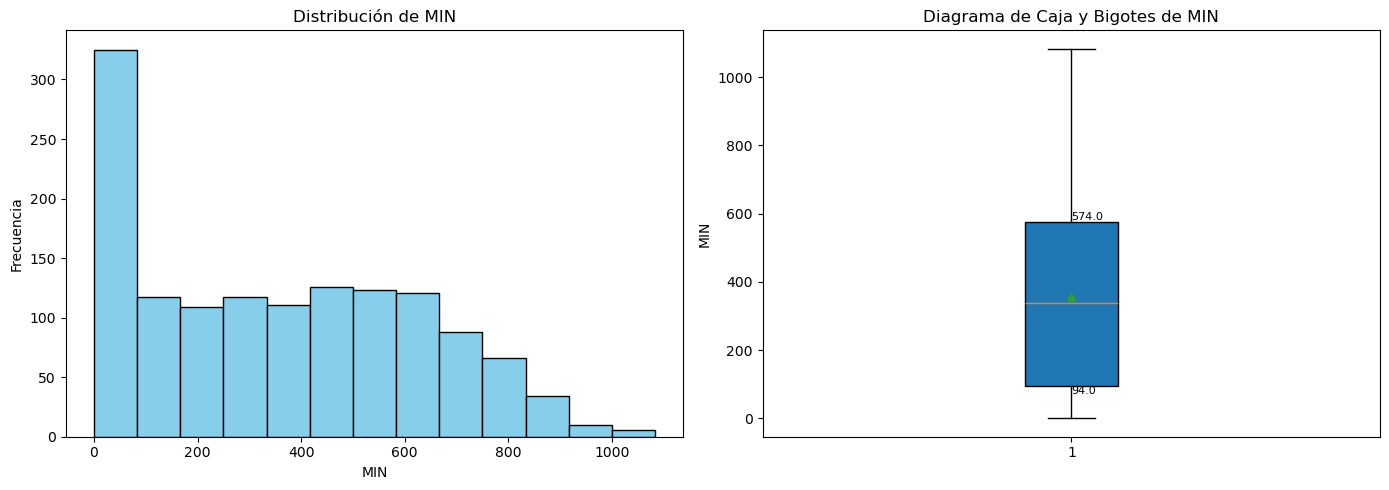

In [4]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'MIN'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.2 Variable *PTS*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 403
Media de la variable: 144.49150036954916
Mediana de la variable: 118.0
Desviación típica de la variable: 129.57878435615004
Valor mínimo: 0.0
Valor máximo: 613.0


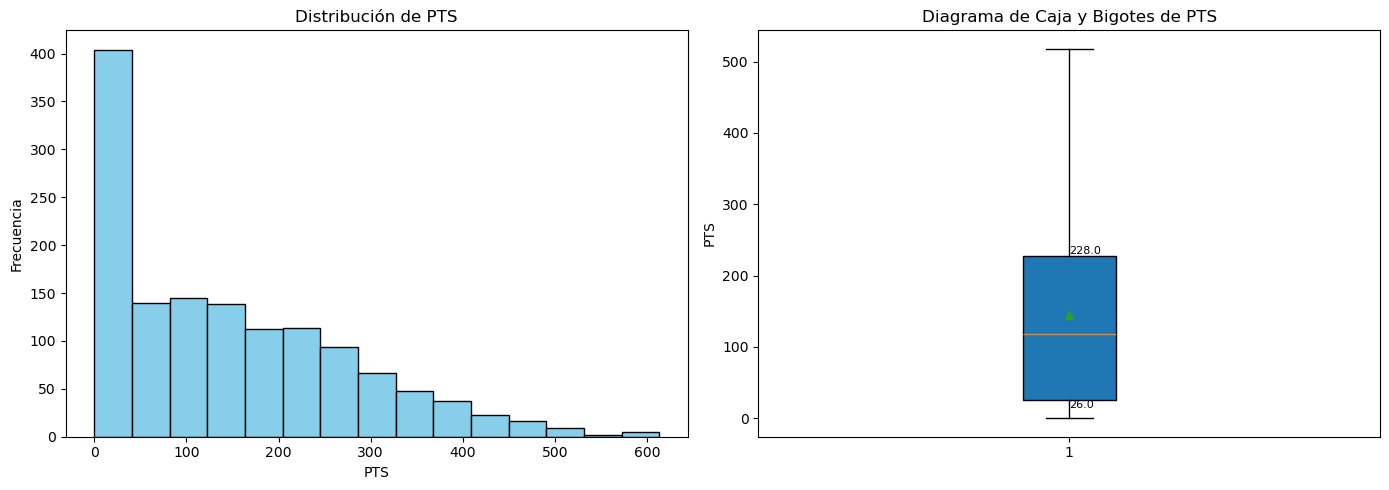

In [5]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'PTS'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.3 Variable *RO*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 84
Media de la variable: 16.338507021433852
Mediana de la variable: 10.0
Desviación típica de la variable: 18.581361226978906
Valor mínimo: 0
Valor máximo: 107


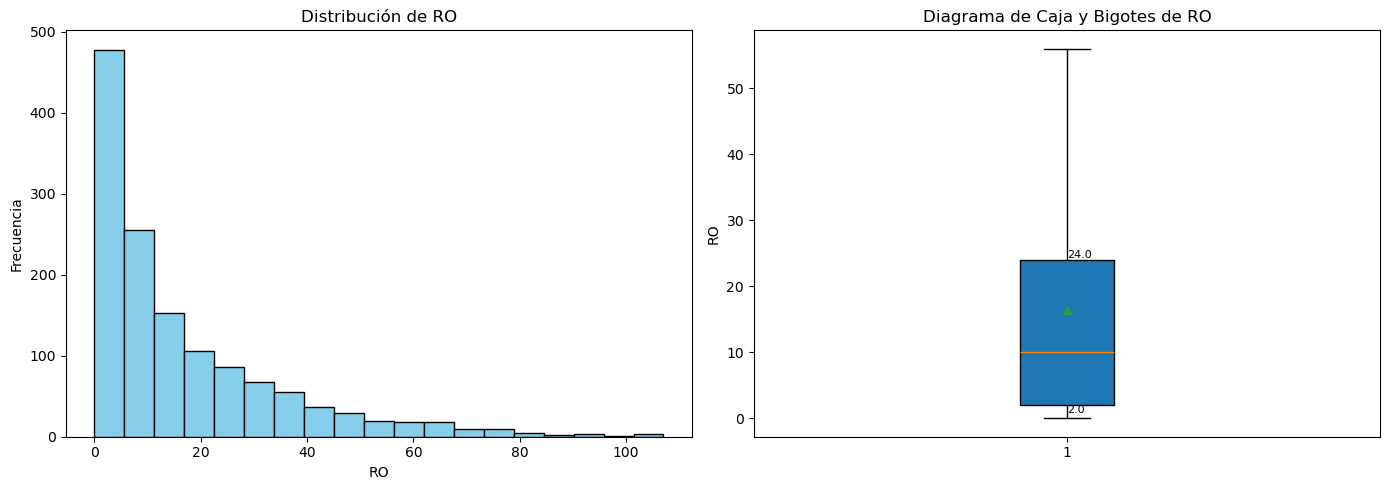

In [6]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'RO'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.4 Variable *RD*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 143
Media de la variable: 39.82779009608278
Mediana de la variable: 33.0
Desviación típica de la variable: 35.906116024540154
Valor mínimo: 0
Valor máximo: 212


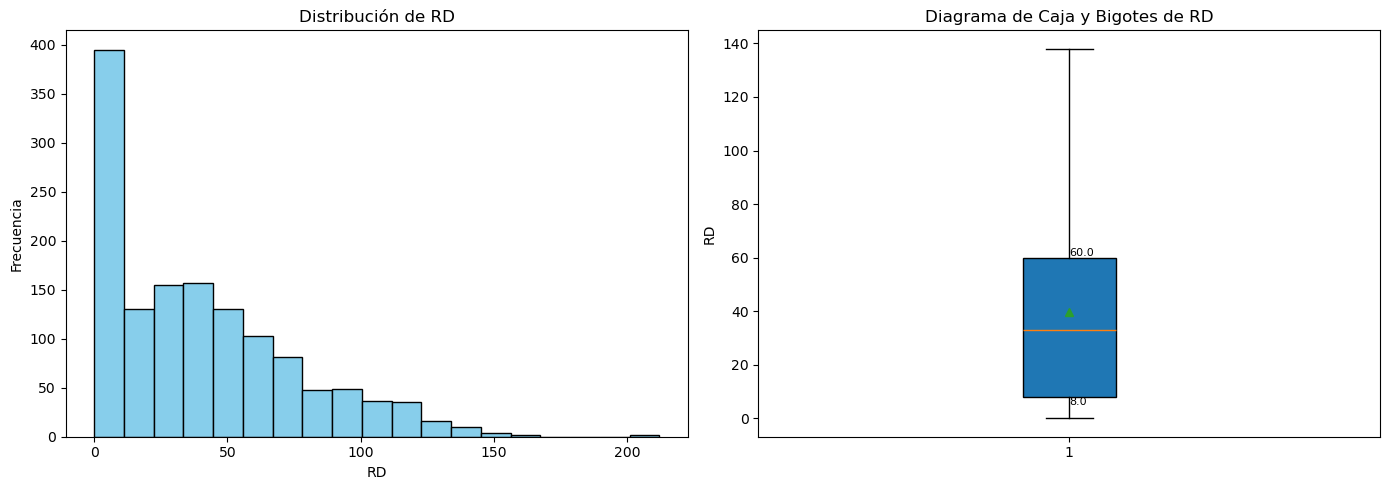

In [7]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'RD'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.5 Variable *RT*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 206
Media de la variable: 56.16629711751663
Mediana de la variable: 46.0
Desviación típica de la variable: 52.584572506034824
Valor mínimo: 0
Valor máximo: 290


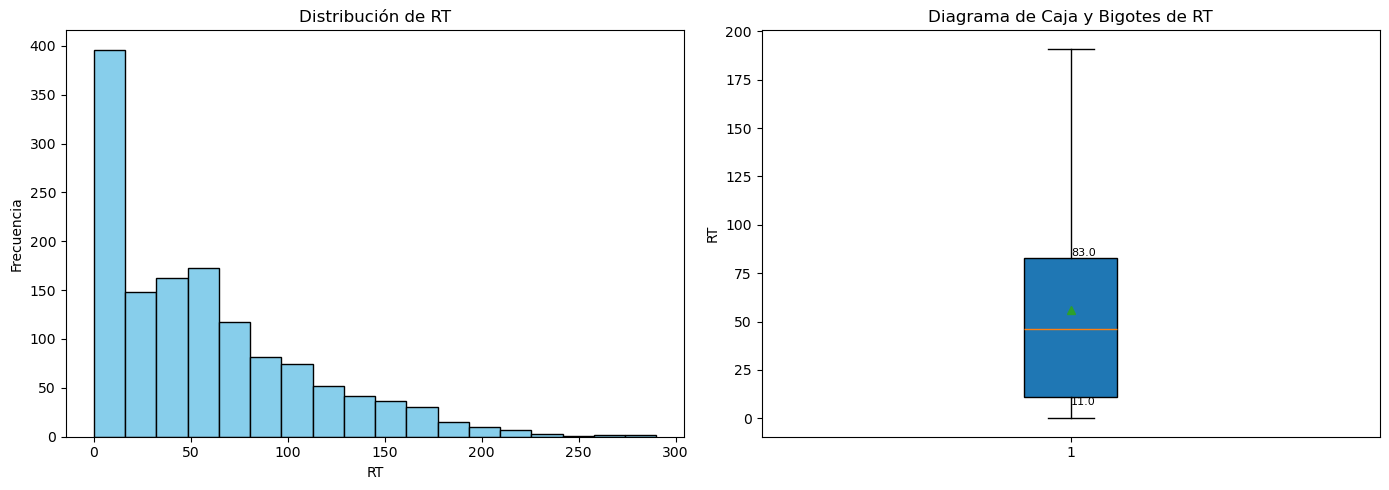

In [8]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'RT'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.6 Variable *AS*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 143
Media de la variable: 28.86917960088692
Mediana de la variable: 16.0
Desviación típica de la variable: 36.27512233726913
Valor mínimo: 0
Valor máximo: 230


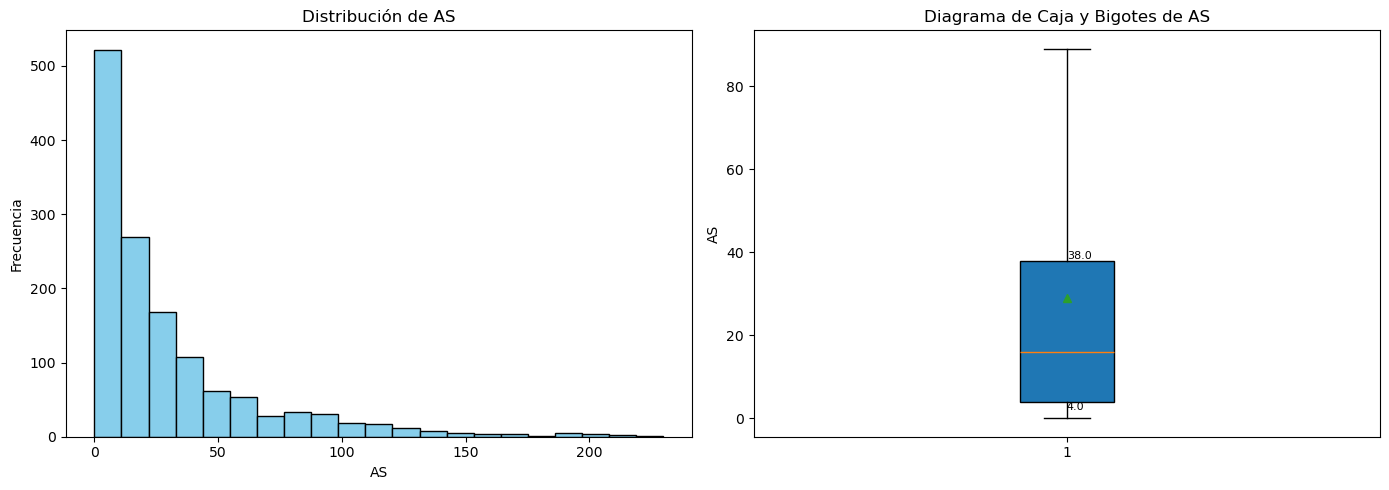

In [9]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'AS'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.7 Variable *PER*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 93
Media de la variable: 22.441980783444198
Mediana de la variable: 19.0
Desviación típica de la variable: 20.179587485951757
Valor mínimo: 0
Valor máximo: 124


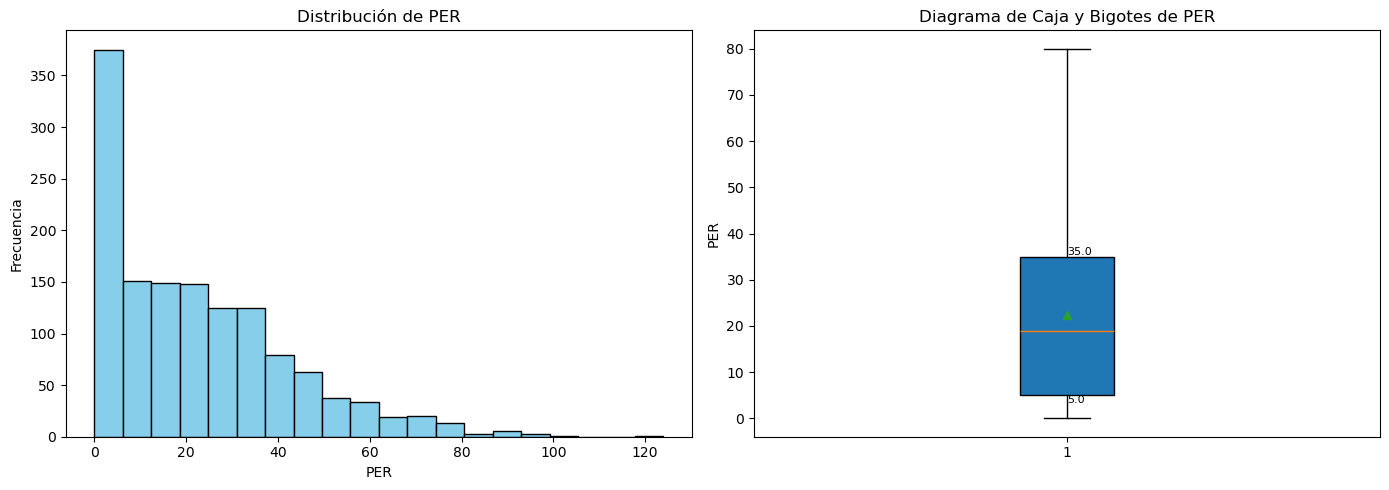

In [10]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'PER'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.8 Variable *REC*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 55
Media de la variable: 12.201034737620104
Mediana de la variable: 10.0
Desviación típica de la variable: 11.337914823193668
Valor mínimo: 0
Valor máximo: 63


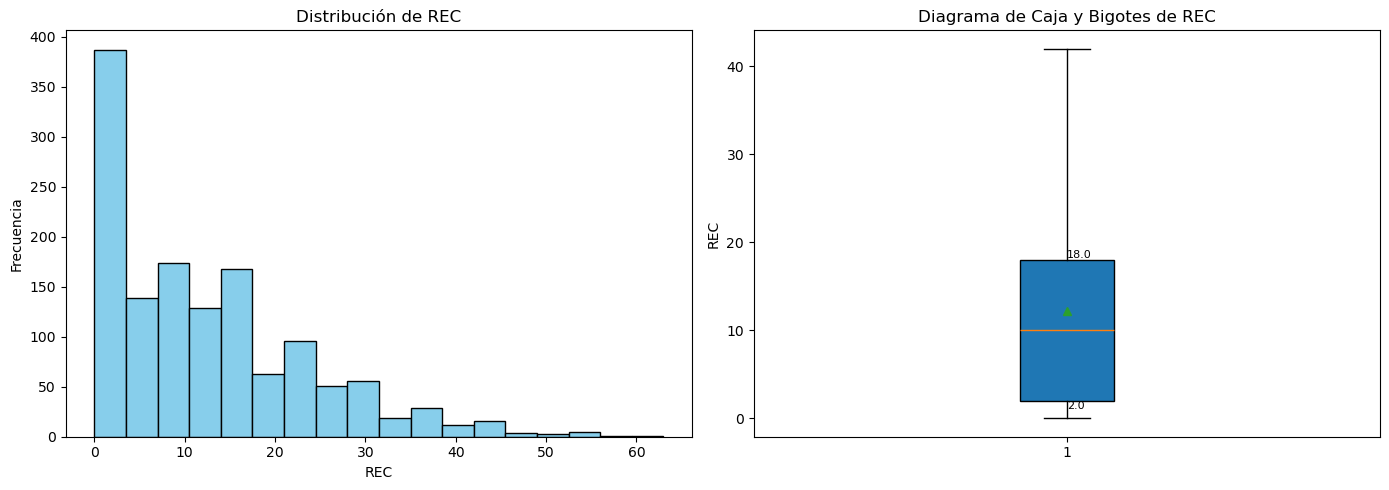

In [11]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'REC'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.9 Variable *TAP* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 48
Media de la variable: 4.639320029563932
Mediana de la variable: 2.0
Desviación típica de la variable: 7.844361983100574
Valor mínimo: 0
Valor máximo: 69


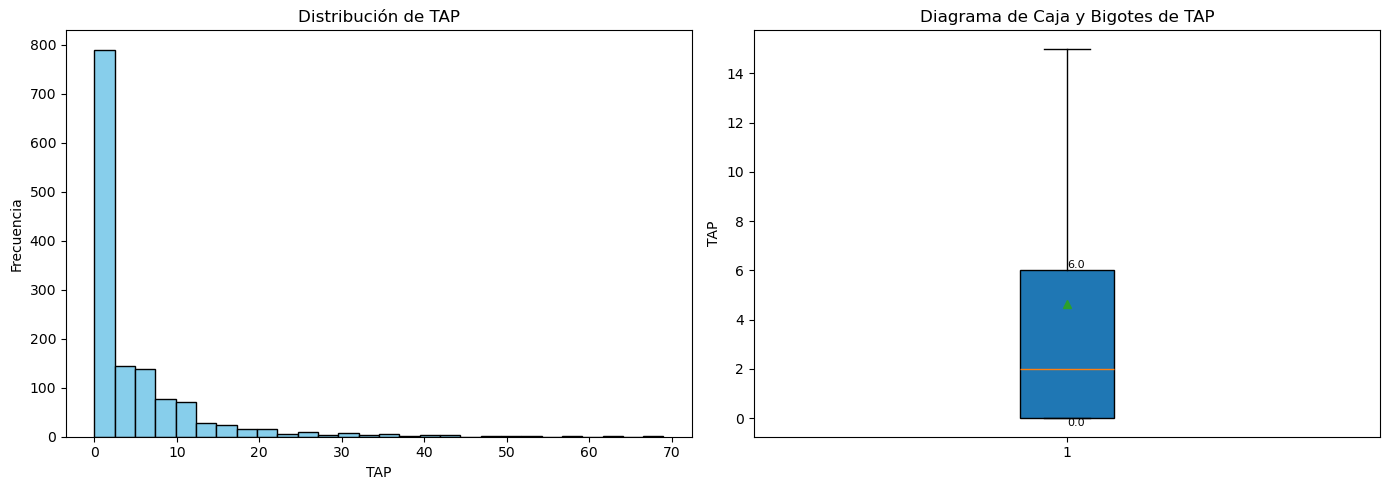

In [12]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'TAP'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.10 Variable *TR* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 26
Media de la variable: 4.541019955654102
Mediana de la variable: 3.0
Desviación típica de la variable: 4.663370212623694
Valor mínimo: 0
Valor máximo: 33


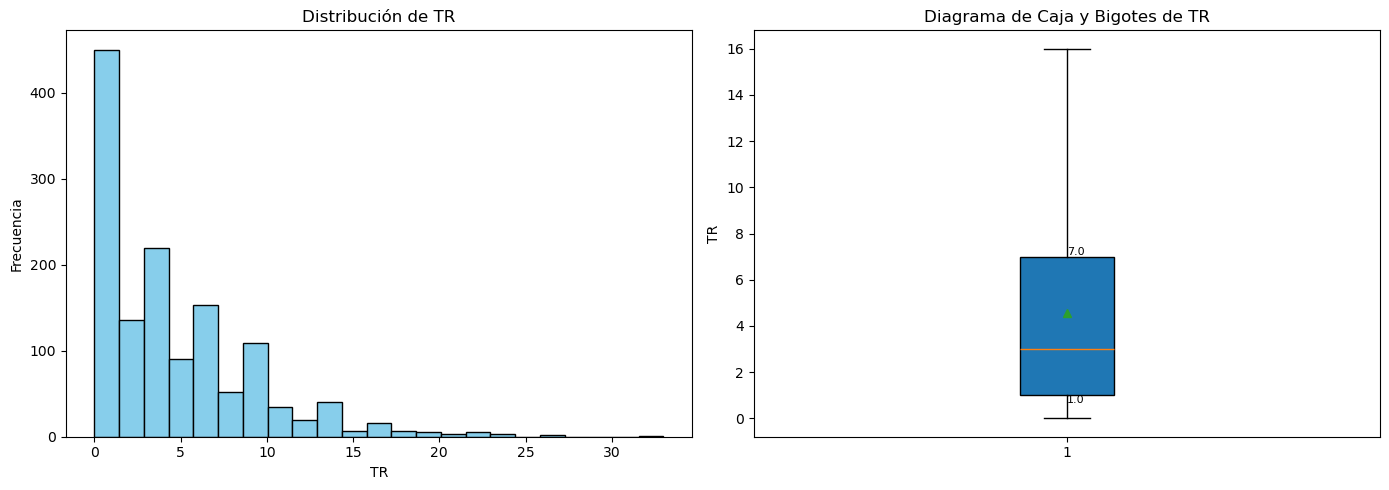

In [13]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'TR'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.11 Variable *MAT* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 51
Media de la variable: 4.428677014042868
Mediana de la variable: 0.0
Desviación típica de la variable: 8.41900882319188
Valor mínimo: 0
Valor máximo: 58


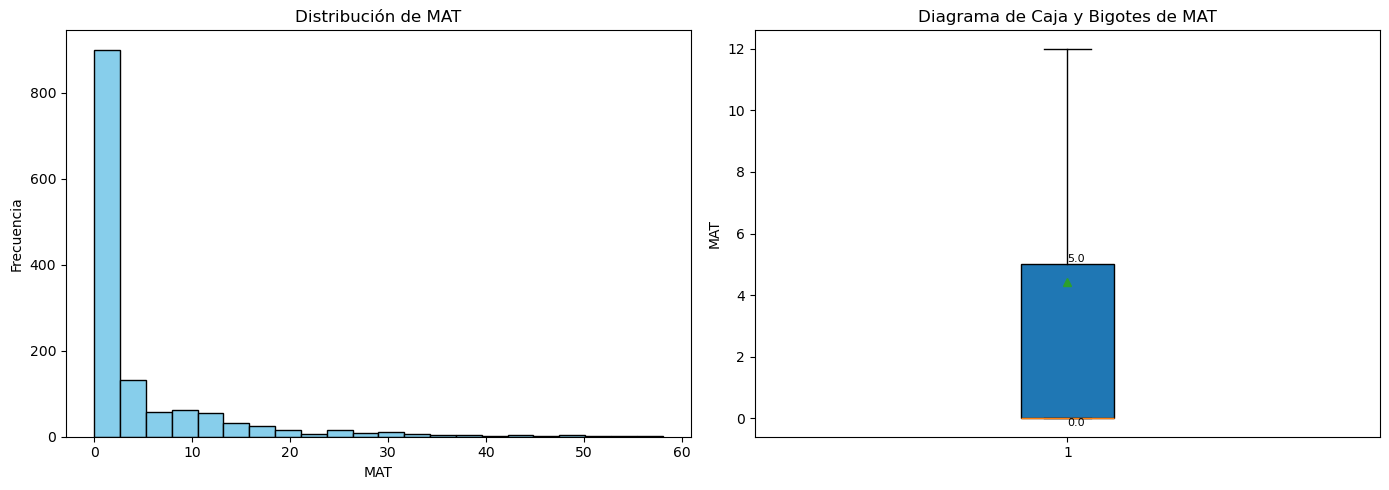

In [14]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'MAT'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.12 Variable *FP* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 105
Media de la variable: 35.69031781226903
Mediana de la variable: 35.0
Desviación típica de la variable: 26.974583192969313
Valor mínimo: 0.0
Valor máximo: 115.0


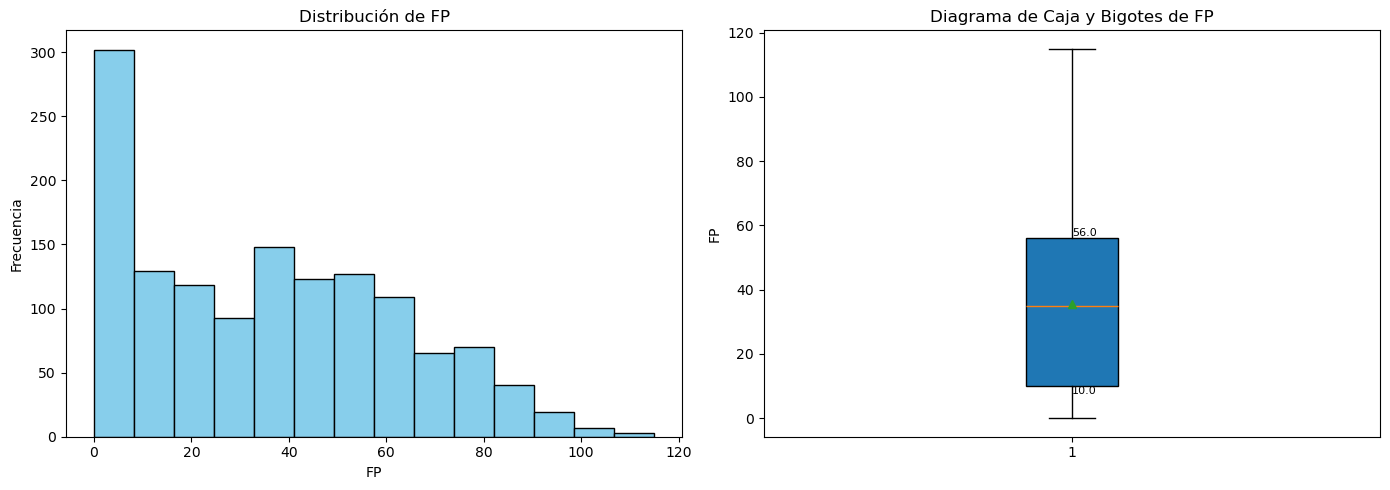

In [15]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'FP'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.13 Variable *FR* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 143
Media de la variable: 35.158167036215815
Mediana de la variable: 27.0
Desviación típica de la variable: 33.85048215609174
Valor mínimo: 0
Valor máximo: 196


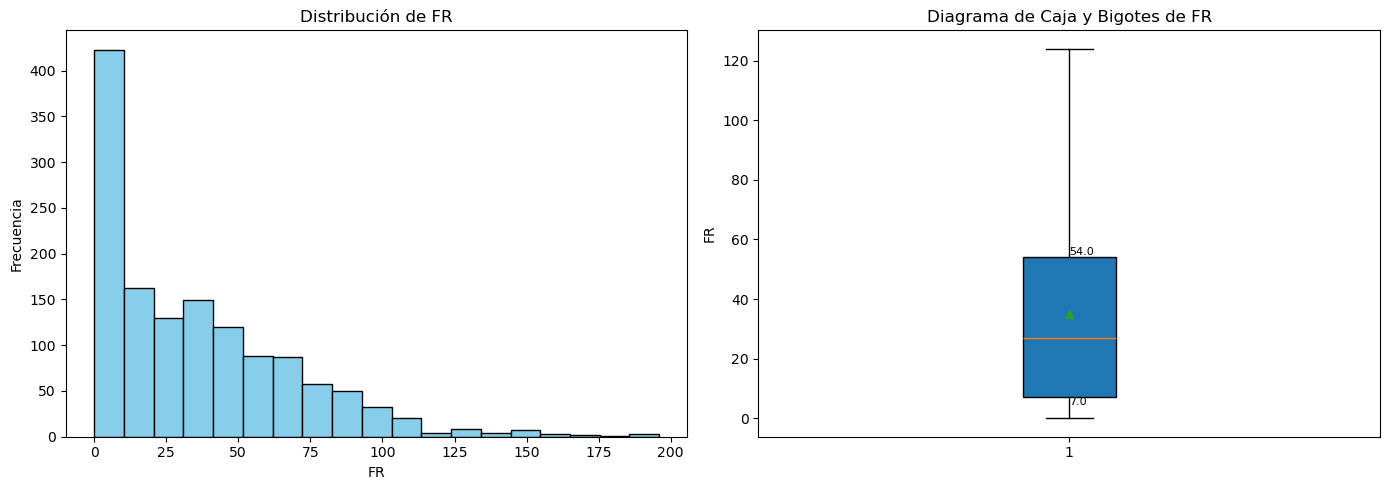

In [16]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'FR'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.14 Variable *+-* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 341
Media de la variable: 0.022912047302291204
Mediana de la variable: -3.0
Desviación típica de la variable: 76.74296360459037
Valor mínimo: -426.0
Valor máximo: 363.0


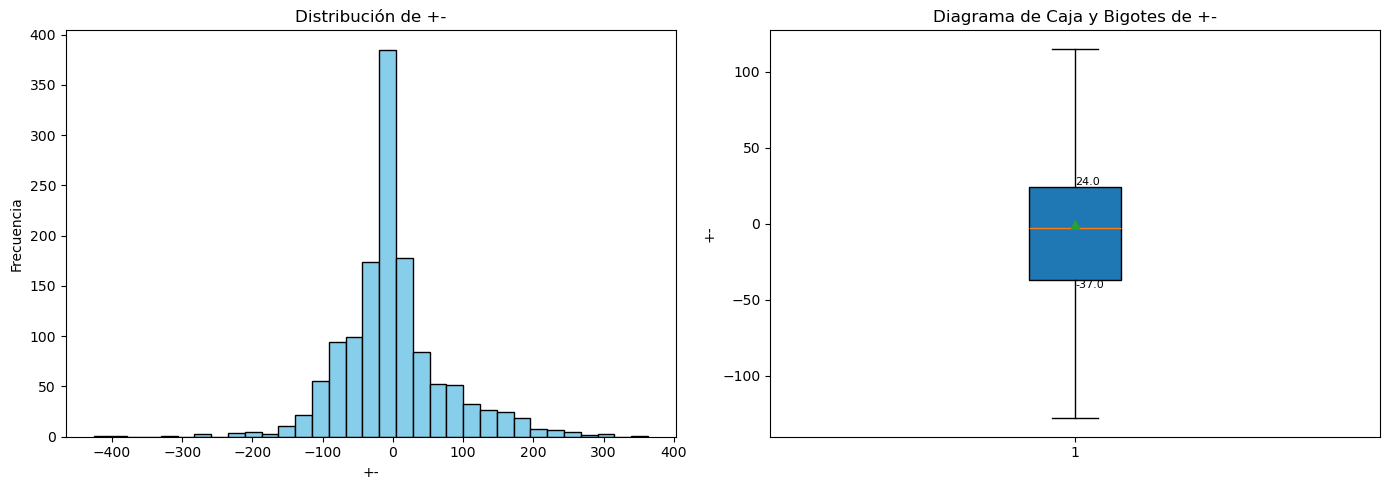

In [17]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = '+-'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.15 Variable *VAL* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 436
Media de la variable: 150.03252032520325
Mediana de la variable: 119.0
Desviación típica de la variable: 143.9140691408447
Valor mínimo: -18.0
Valor máximo: 811.0


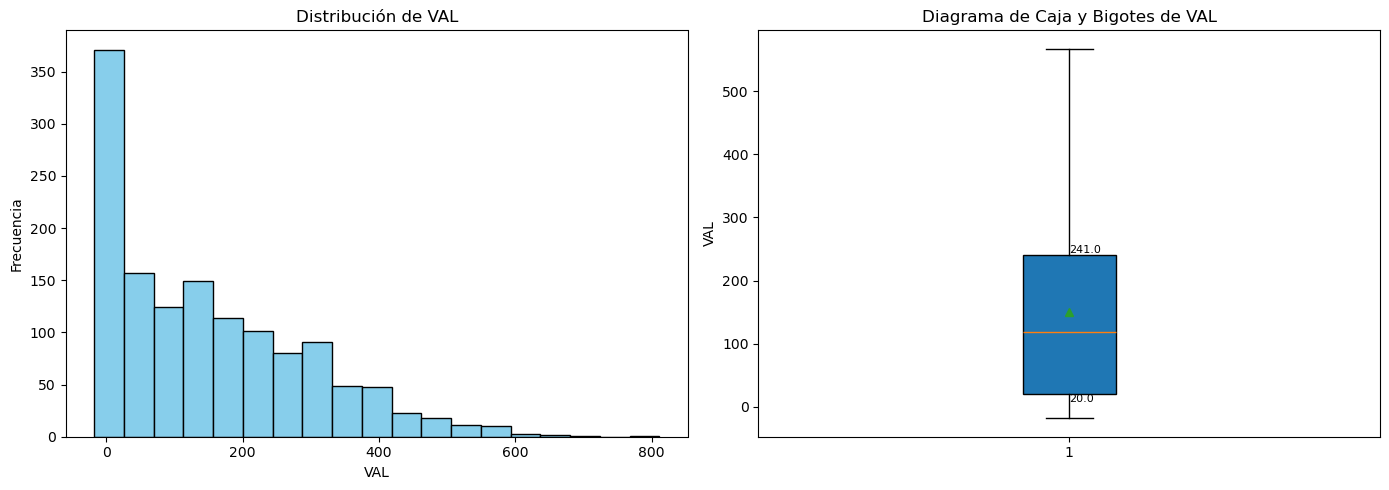

In [18]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'VAL'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.16 Variable *T2A* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 148
Media de la variable: 35.78566149297857
Mediana de la variable: 25.0
Desviación típica de la variable: 36.42995875439428
Valor mínimo: 0
Valor máximo: 220


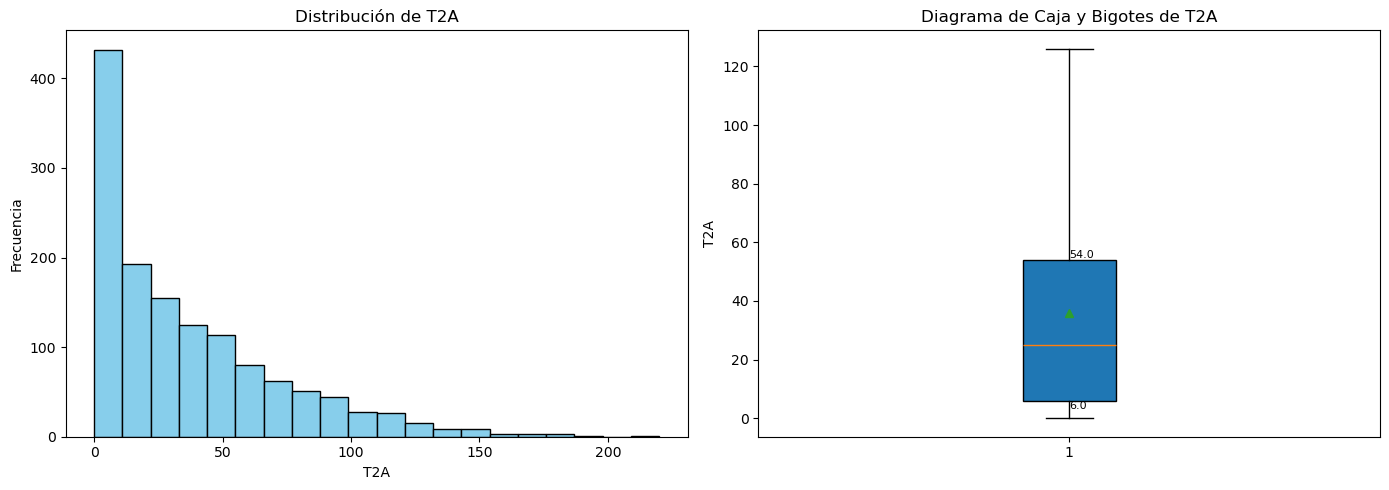

In [19]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'T2A'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.17 Variable *T2L* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 239
Media de la variable: 67.24316334072432
Mediana de la variable: 51.0
Desviación típica de la variable: 64.60910568886423
Valor mínimo: 0
Valor máximo: 337


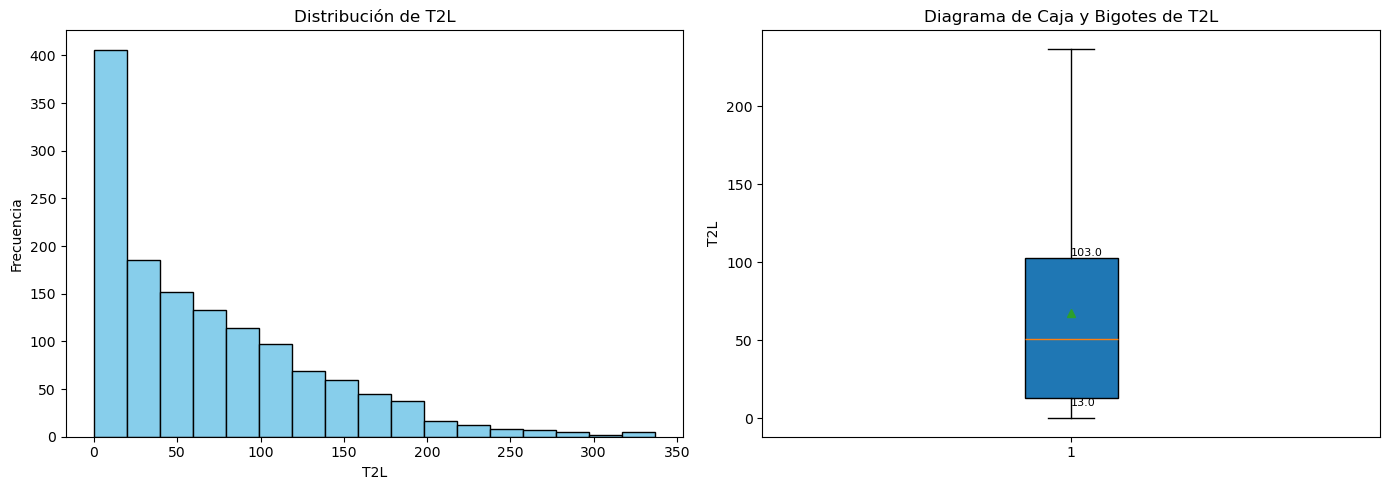

In [20]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'T2L'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.18 Variable *T3A* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 84
Media de la variable: 16.045824094604583
Mediana de la variable: 9.0
Desviación típica de la variable: 18.7850098968317
Valor mínimo: 0
Valor máximo: 97


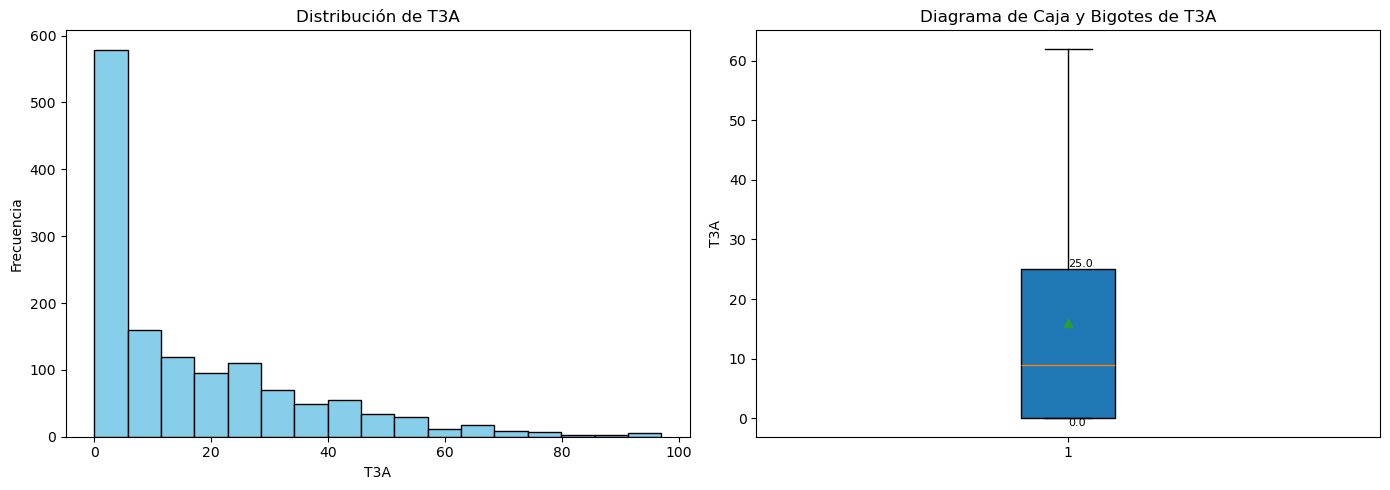

In [21]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'T3A'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.19 Variable *T3L* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 190
Media de la variable: 45.28972653362897
Mediana de la variable: 29.0
Desviación típica de la variable: 49.306855471108946
Valor mínimo: 0
Valor máximo: 261


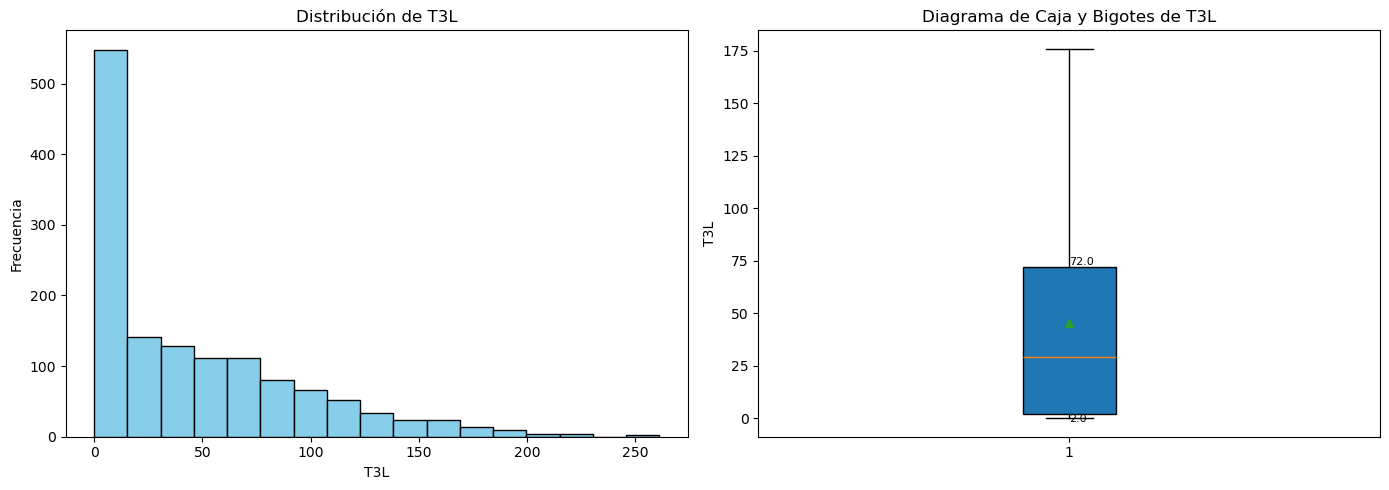

In [22]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'T3L'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.20 Variable *TLA* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 117
Media de la variable: 24.78270509977827
Mediana de la variable: 18.0
Desviación típica de la variable: 26.7057175816858
Valor mínimo: 0
Valor máximo: 174


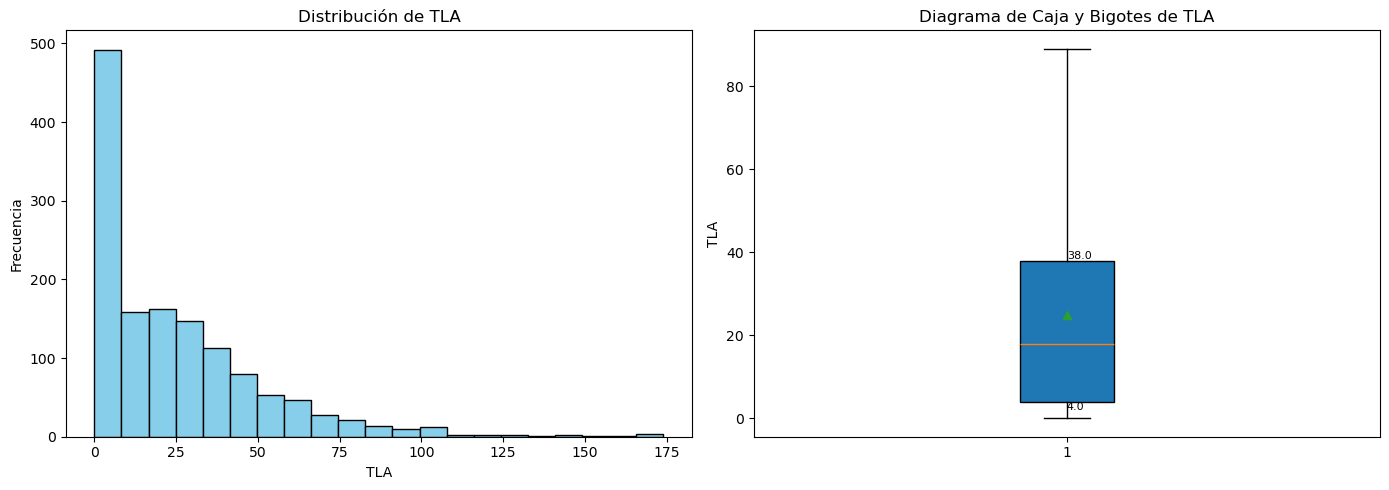

In [23]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'TLA'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.21 Variable *TLL* 

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: int64
Nº de valores únicos: 143
Media de la variable: 32.900960827790094
Mediana de la variable: 24.0
Desviación típica de la variable: 34.20626530848162
Valor mínimo: 0
Valor máximo: 221


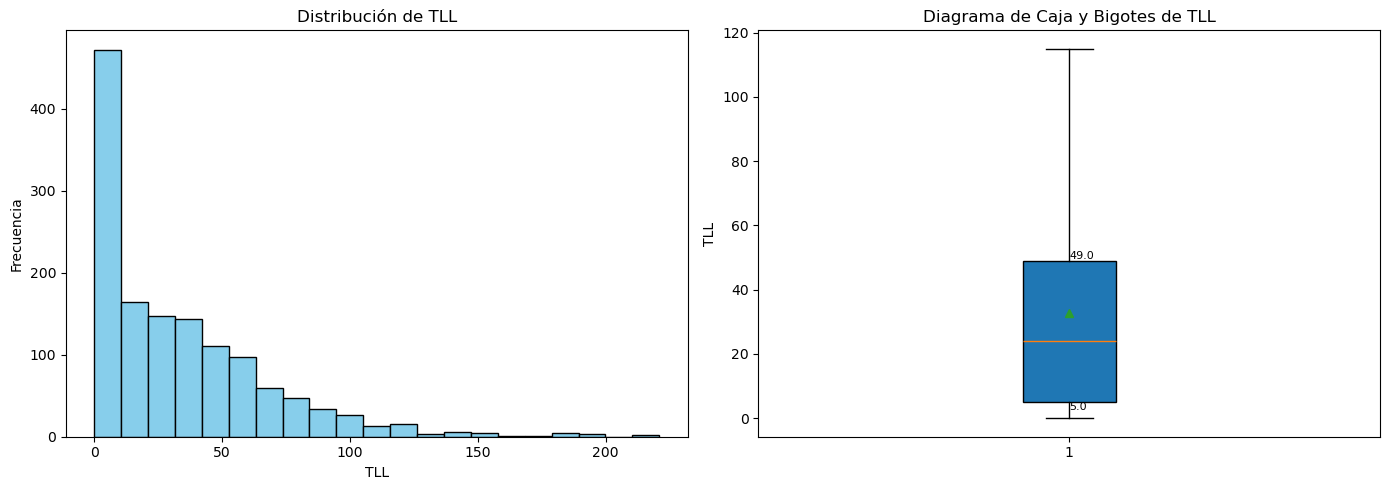

In [24]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'TLL'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

## 3. Conclusiones

Tras el análisis de todas las variables que constiyen las *estadísticas totales individuales* se pasa a comentar las siguientes conclusiones sobre el conjunto de datos:
* **Estructura de la información.** Como ha sido observado, todas las variables que conforman el conjunto de datos se encuentra en formato numérico (ya sea en formato int64 o float). Además, no ha sido detectado ningún elemento vacío ni nulo dentro de los datos.
* **Distribución y variabilidad en las variables.** De manera general, se ha observado que en todas las variables existe un alto grado de diversidad de valores y un alto grado de variabilidad de valores. Además, también se puede observar de manera generalizada que la media supera a la mediana en las variables lo que indica una tendencia en la variables a valores más altos que dependiendo del uso que se den pueden considerarse como valores atípicos.
* **Variable MIN**. Se ha observado que el primer cuartil de los datos se encuentra en el valor de 94. Este valor será tomado como referencia para la realización de filtrados sobre el conjunto de datos para seleccionar aquellos jugadores que hayan jugado un mínimo de minutos.

Estos puntos son los más relevantes tras el análisis del conjunto de datos y se tendrán en cuenta para el uso de los datos en los futuros análisis dentro del Trabajo Fin de Máster.